In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

names = open('names.txt').read().split('\n')

chars = {'.': 0}
set_chars = set()

for name in names:
    for char in name.lower(): 
        set_chars.add(char)

for i, letter in enumerate(sorted(list(set_chars))):
    chars[letter] = i + 1

keys_chars = list(chars.keys())

N = torch.zeros((27, 27), dtype=torch.int64)

for name in names:
    name = name.lower() 
    sequence = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(sequence, sequence[1:]):
        N[chars[ch1], chars[ch2]] += 1

array = N.numpy()

plt.figure(figsize=(16, 16))
plt.imshow(array, cmap='viridis', interpolation='nearest')
plt.colorbar()

for (i, j), val in np.ndenumerate(array):
    if val > 0: 
        plt.text(j, i, f'{val}\n{keys_chars[i]}{keys_chars[j]}', ha='center', va='center', color='white')

plt.xticks(ticks=np.arange(27), labels=keys_chars)
plt.yticks(ticks=np.arange(27), labels=keys_chars)
plt.xlabel("Following Character")
plt.ylabel("Current Character")
plt.title("Frequency Matrix of Character Sequences in Names")

plt.tight_layout()
plt.show()


In [3]:
### Easy Problem

In [4]:
names = open('names.txt').read().split('\n')
chars = {'.':0,}  # '.' - mean 'end of text' or 'start of text'
set_chars = set()
for i in names:
    for j in str(i):
        set_chars.add(j)
for i, letter in enumerate(sorted(list(set_chars))):
    chars[letter] = i + 1
list_of_names = '.'.join(names)
list_to_loop_of_names = ['.']
list_to_loop_of_names+= list(list_of_names)
keys_chars = list(chars.keys())

In [5]:
N = torch.ones((27, 27), dtype=torch.int64)
for i in names[:]:
    list_to_loop_of_names = ['.'] + list(i) + ['.']
    for ch1, ch2 in list(zip(list_to_loop_of_names, list_to_loop_of_names[1:])):
        N[chars[ch1]][chars[ch2]] += 1
N[0][0] = 0
array = N

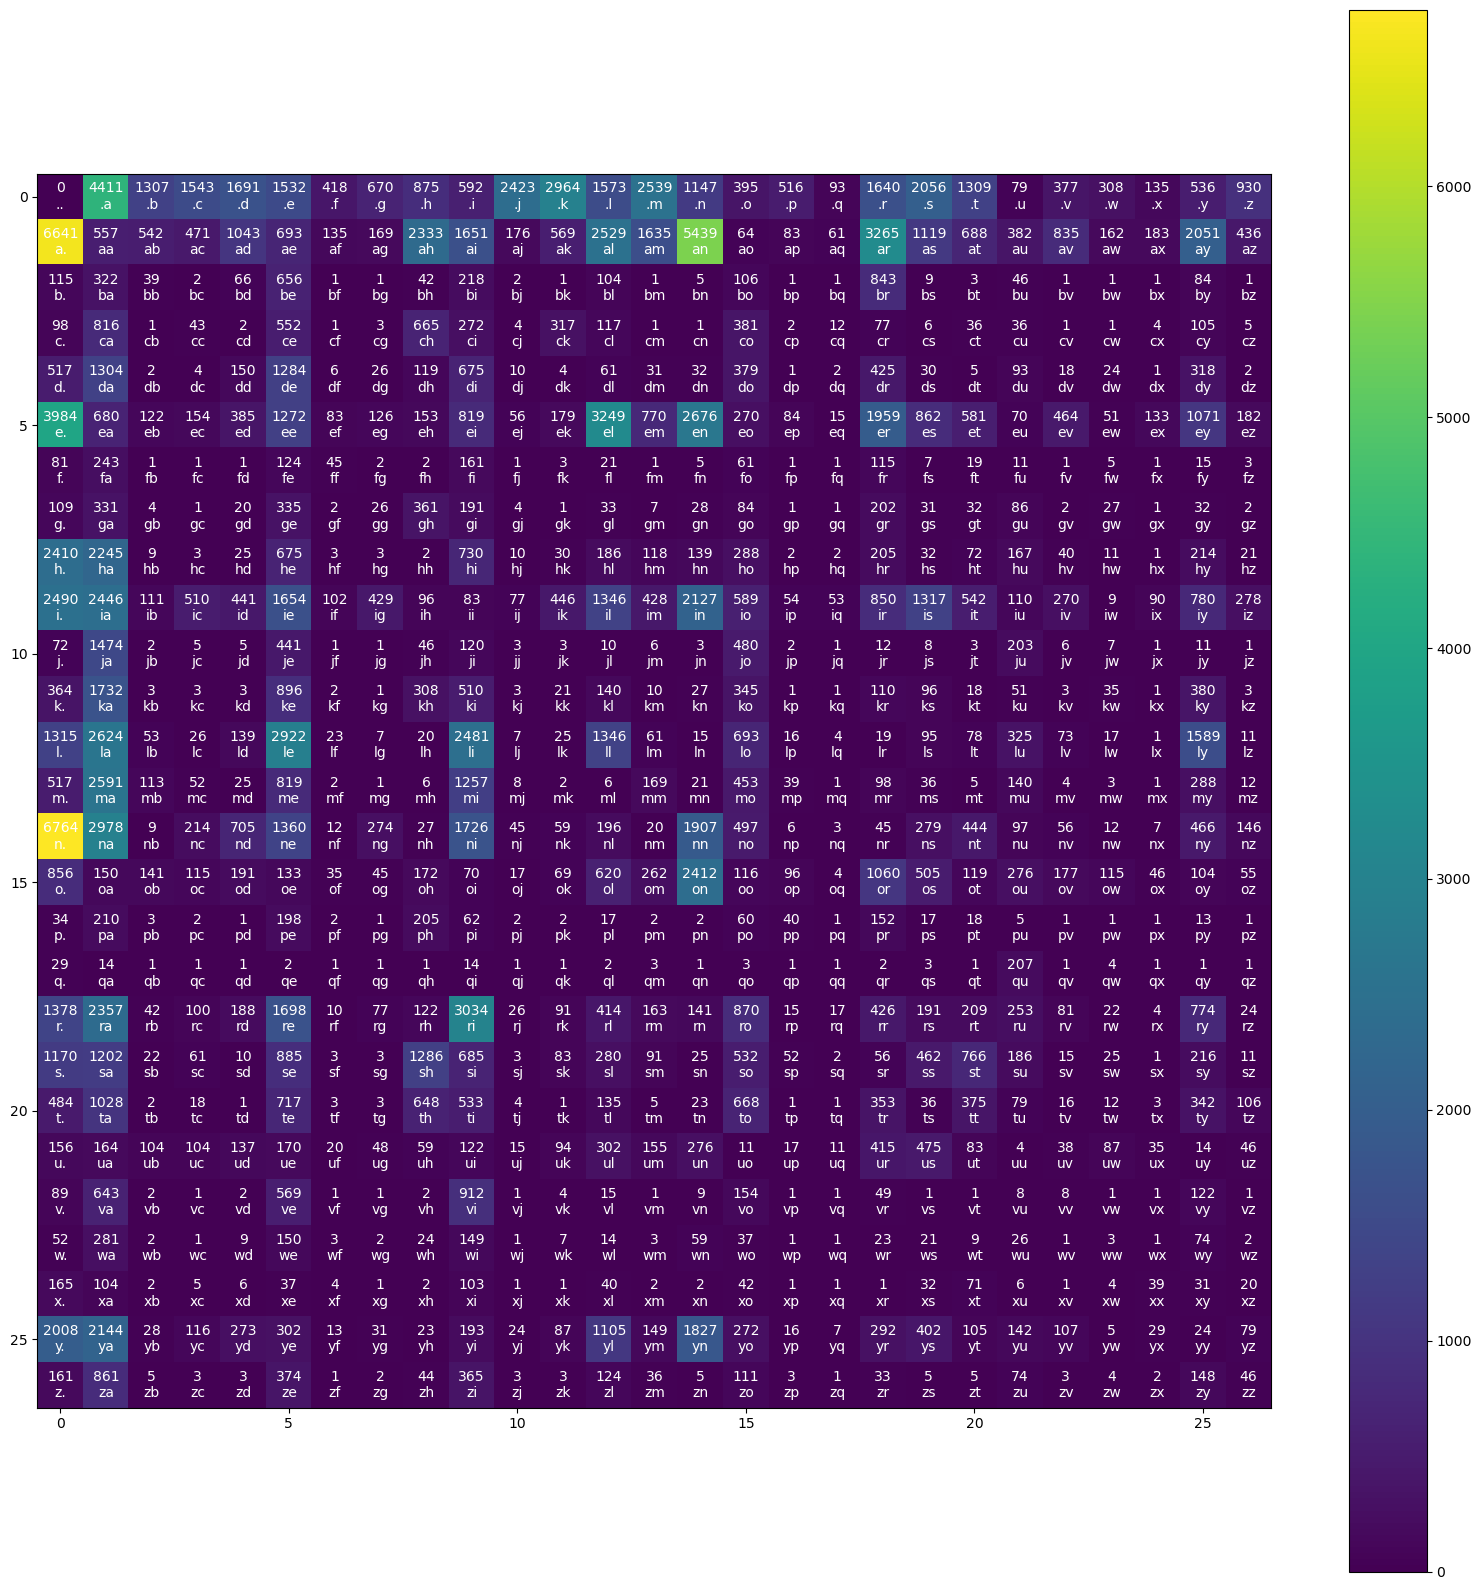

In [6]:
plt.figure(figsize=(16, 16))  # Adjust size as needed

plt.imshow(array, cmap='viridis', interpolation='nearest')

plt.colorbar()

for (i, j), val in np.ndenumerate(array):
    plt.text(j, i, f'{val}\n{keys_chars[i]}{keys_chars[j]}', ha='center', va='center', color='white')


plt.tight_layout() 
plt.show()

In [7]:
probs = torch.zeros((27, 27), dtype=torch.float64)
probs = N.to(torch.float64)
probs = N.to(torch.float64) / torch.sum(probs, dim=1, keepdim=True)

In [8]:
for i in range(8):
    name = '.'
    
    while True:
        name += str(keys_chars[torch.multinomial(probs[int(chars[name[-1]])], num_samples=1, replacement=False).item()])
        if name[-1] == '.':
            print(name.replace('.', ''))
            break

jolelliedeh
majio
ryleili
zerie
sistegoni
za
jharyn
ytid


In [9]:
# LOSS CALCULATION

xs, ys = [], []
for word in names:
    list_to_loop_of_names = ['.'] + list(word) + ['.']
    for ch1, ch2 in list(zip(list_to_loop_of_names, list_to_loop_of_names[1:])):
        xs.append(chars[ch1])
        ys.append(chars[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)
total = 0

# for i in range(xs.nelement()):
#     total += probs[xs[i], ys[i]].log()
# print(total/xs.nelement() * -1)
print(-1*probs[xs, ys].log().mean()) #2.4540 or 2.4546

tensor(2.4546, dtype=torch.float64)
